# STAT207 Final Project - Predicting Sequel


Austin Abraham, Kaiwen Chen, Laila Shaaban, Linh Pham

In [1]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

## 1. Introduction

Our motivation for building a predictive model that predicts `Metadata.Sequel?` is to examine if there are any specific factors that are related to whether or not a video game has a sequel. A video game developer who want to create a new successful video game franchise might be interested in this model as in can give them insight about how to create a good video game that is qualified for sequels.

## 2. Dataset Discussion

I got this dataset from the given zip file that Professor Ellision got from [link][datasetlink]. We downloaded this file along with the rest of the project files on April 17, 2024. Each row in the dataset represents a different feature of a video game and the columns are different video games with scores or answers for the feature represented. For our explanatory variables, we will be focusing on: _______ in order to predict _____.

[datasetlink]: https://corgis-edu.github.io/corgis/csv/video_games/

In [2]:
dforiginal = pd.read_csv('video_games.csv')
dforiginal.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [3]:
print('Dimensions of dataframe:',dforiginal.shape)

Dimensions of dataframe: (1212, 36)


In [4]:
# Selecting Our Explanatory Variables & Response
dfselect = dforiginal[['Metrics.Review Score','Release.Rating','Length.Main Story.Polled','Metrics.Sales','Length.All PlayStyles.Average', 'Metadata.Sequel?']]
dfselect.head()

,Metrics.Review Score,Release.Rating,Length.Main Story.Polled,Metrics.Sales,Length.All PlayStyles.Average,Metadata.Sequel?
0,85,E,21,4.69,22.716667,True
1,89,E,3,0.56,10.100000,True
2,81,E,30,0.54,4.566667,True
3,81,E,0,0.49,0.000000,True
4,61,E,23,0.45,13.250000,True


## 3. Dataset Cleaning

In [5]:
df = dfselect.dropna()
print('Number of Rows Dropped:',len(dfselect)-len(df))
df.head()

Number of Rows Dropped: 0


,Metrics.Review Score,Release.Rating,Length.Main Story.Polled,Metrics.Sales,Length.All PlayStyles.Average,Metadata.Sequel?
0,85,E,21,4.69,22.716667,True
1,89,E,3,0.56,10.100000,True
2,81,E,30,0.54,4.566667,True
3,81,E,0,0.49,0.000000,True
4,61,E,23,0.45,13.250000,True


In [6]:
df['Metadata_Sequel']=df['Metadata.Sequel?']

In [7]:
df['Metrics_ReviewScore']=df['Metrics.Review Score']

In [8]:
df['Release_Rating']=df['Release.Rating']

In [9]:
df['Length_MainStory_Polled']=df['Length.Main Story.Polled']

In [10]:
df['Metrics_Sales']=df['Metrics.Sales']

In [11]:
df['Length_AllPlayStyles_Average']=df['Length.All PlayStyles.Average']

In [12]:
df=df[['Metadata_Sequel', 'Metrics_ReviewScore', 'Release_Rating', 'Length_MainStory_Polled', 'Metrics_Sales', 'Length_AllPlayStyles_Average']]

In [13]:
print(df.isna().sum())
print(df.dtypes)

Metadata_Sequel                 0
Metrics_ReviewScore             0
Release_Rating                  0
Length_MainStory_Polled         0
Metrics_Sales                   0
Length_AllPlayStyles_Average    0
dtype: int64
Metadata_Sequel                    bool
Metrics_ReviewScore               int64
Release_Rating                   object
Length_MainStory_Polled           int64
Metrics_Sales                   float64
Length_AllPlayStyles_Average    float64
dtype: object


## 4. Preliminary Analysis

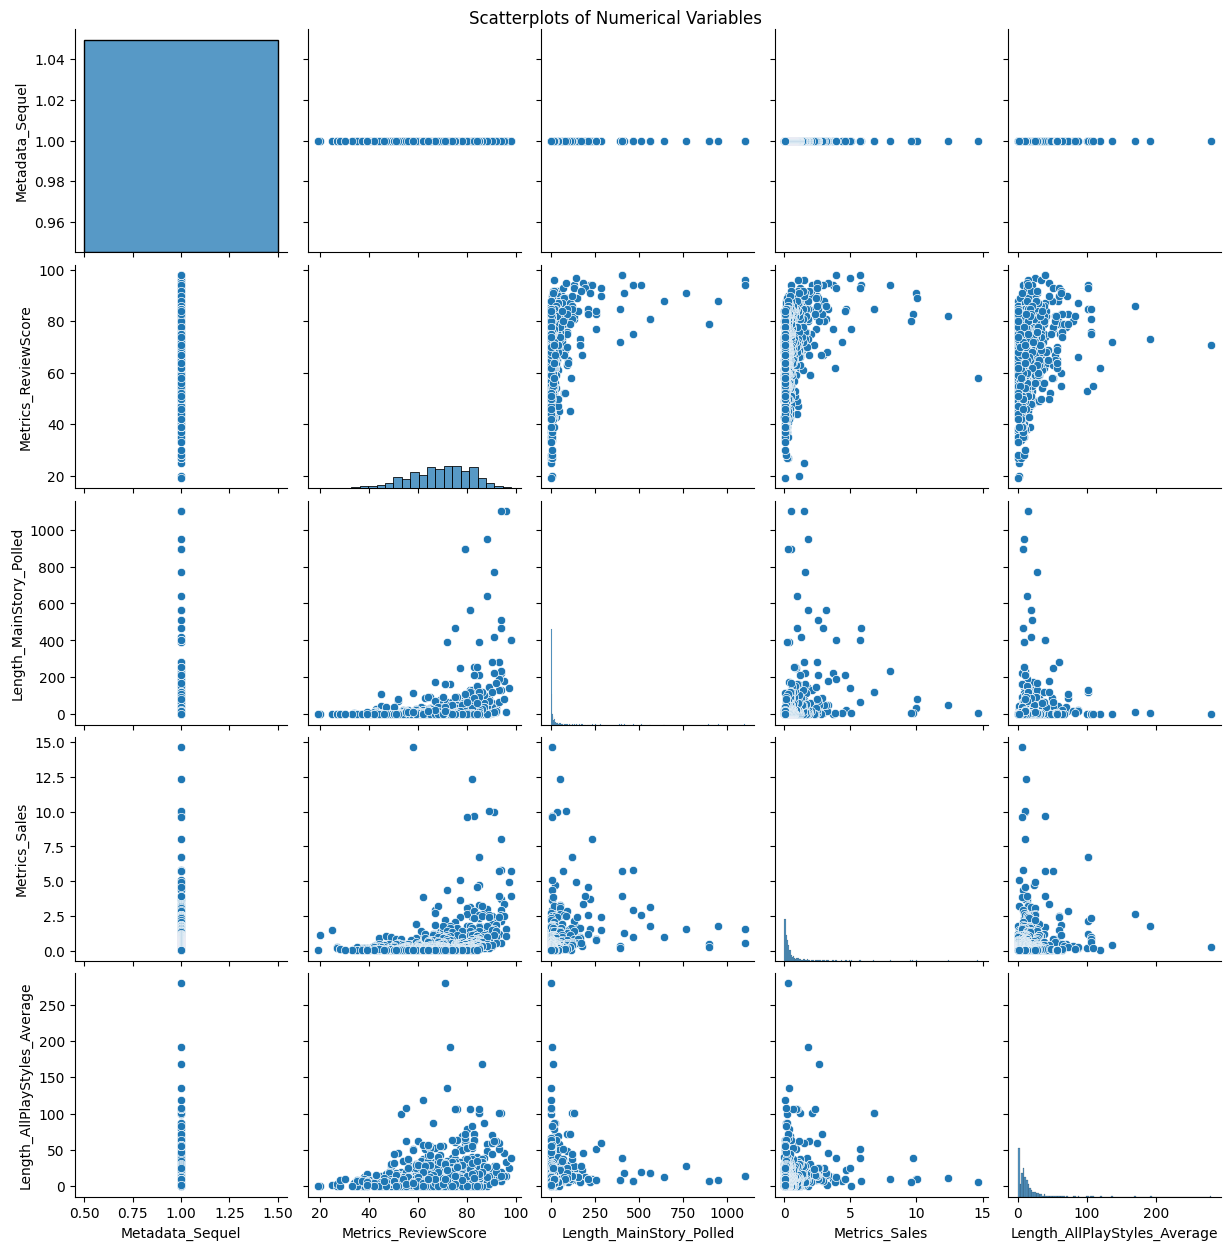

In [14]:
sns.pairplot(df)
plt.suptitle('Scatterplots of Numerical Variables', y = 1)
plt.show()

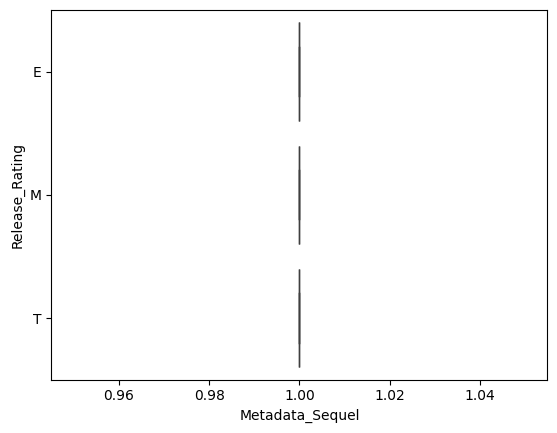

In [16]:
#Metadata.Sequel? and Release.Rating
sns.boxplot(x='Metadata_Sequel', y='Release_Rating', data=df)
plt.show()

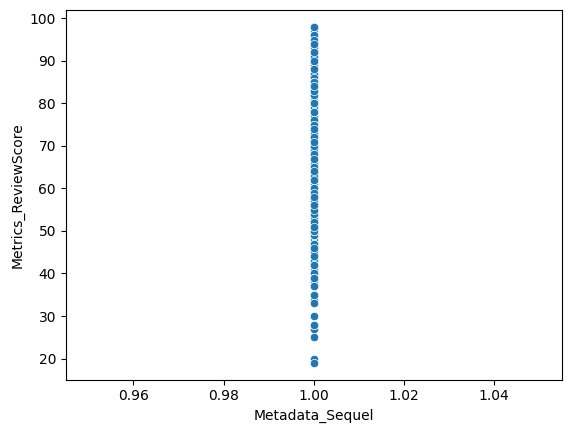

In [17]:
#Metadata.Sequel? and Metrics.Review Score
sns.scatterplot(x='Metadata_Sequel', y='Metrics_ReviewScore', data=df)
plt.show()

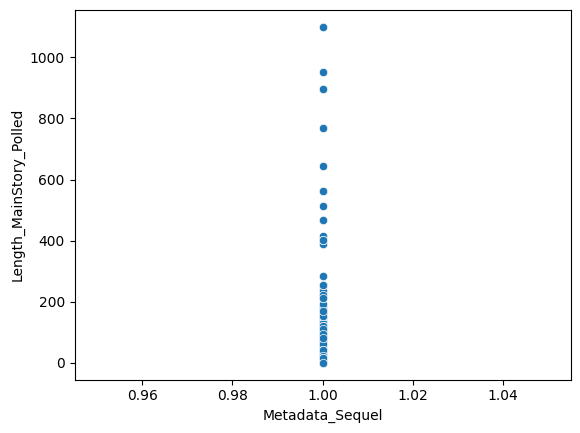

In [18]:
#Metadata.Sequel? and Length.Main Story.Polled
sns.scatterplot(x='Metadata_Sequel', y='Length_MainStory_Polled', data=df)
plt.show()

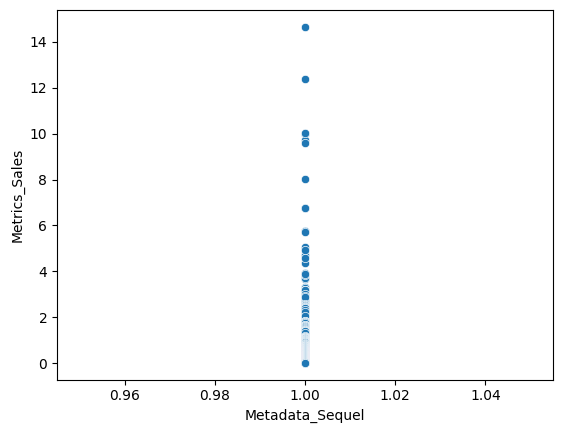

In [20]:
#Metadata.Sequel? and Metrics.Sales
sns.scatterplot(x='Metadata_Sequel', y='Metrics_Sales', data=df)
plt.show()

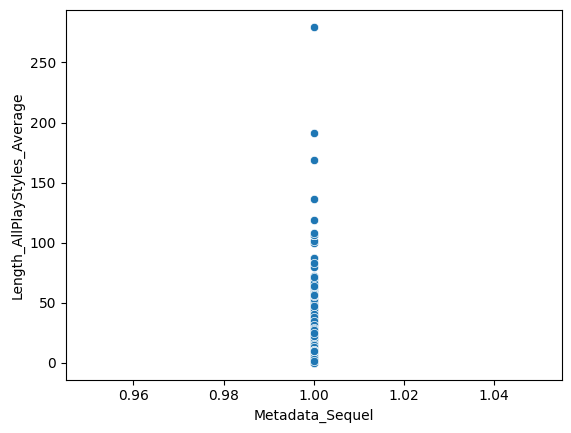

In [21]:
#Metadata.Sequel? and Length.All Playstyles.Average
sns.scatterplot(x='Metadata_Sequel', y='Length_AllPlayStyles_Average', data=df)
plt.show()

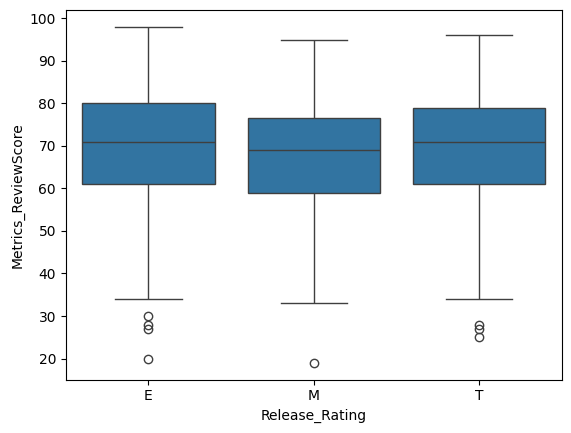

In [22]:
#Release.Rating and Metrics.Review Score
sns.boxplot(x='Release_Rating', y='Metrics_ReviewScore', data=df)
plt.show()

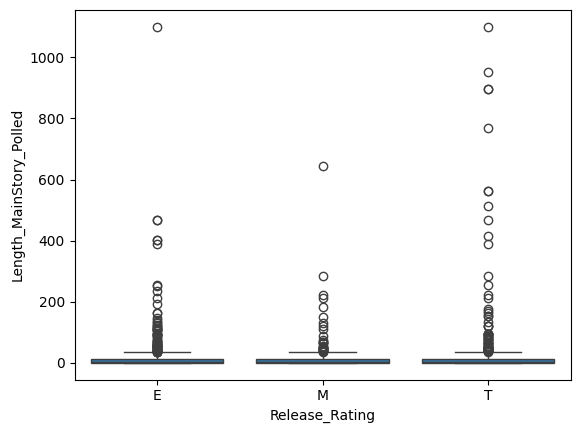

In [23]:
#Release.Rating and Length.Main Story.Polled
sns.boxplot(x='Release_Rating', y='Length_MainStory_Polled', data=df)
plt.show()

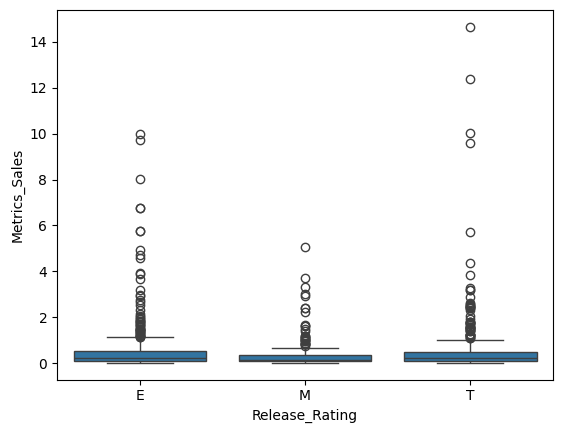

In [24]:
#Release.Rating and Metrics.Sales
sns.boxplot(x='Release_Rating', y='Metrics_Sales', data=df)
plt.show()

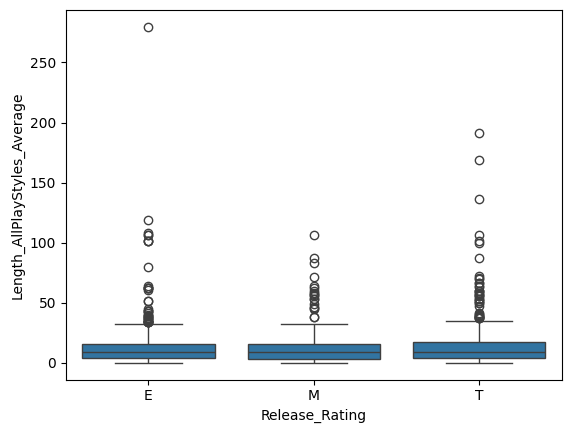

In [25]:
#Release.Rating and Length.All PlayStyles.Average
sns.boxplot(x='Release_Rating', y='Length_AllPlayStyles_Average', data=df)
plt.show()

C:\Users\linhp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\linhp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\linhp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


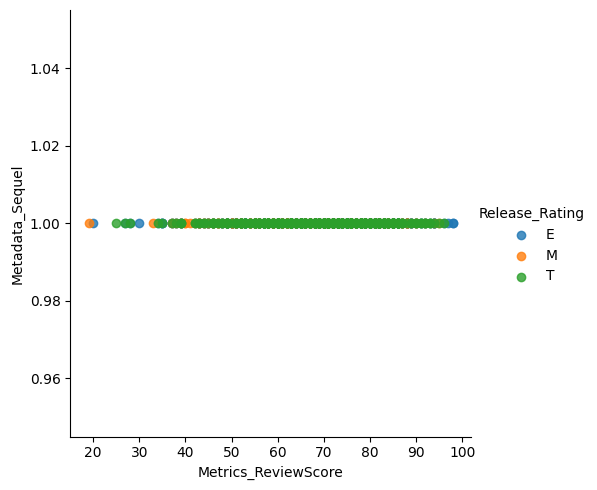

ValueError: endog has evaluated to an array with multiple columns that has shape (1212, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [26]:
sns.lmplot(x='Metrics_ReviewScore', y='Metadata_Sequel', hue='Release_Rating', data=df, logistic=True, ci=False)
plt.show()
simple_log_mod=smf.logit("Metadata_Sequel~Release_Rating+Metrics_ReviewScore", data=df[df['Metadata_Sequel']==True]).fit()
display(simple_log_mod.summary().tables[1])

## 5. Model Data Preprocessing

## 6. Feature Selection with k-Fold Cross-Validation

## 7. Best Model Discussion

## 8. Additional Analysis/Insight

## 9. Conclusion

## References